# DSC410: Term Project
---

**Name**: Joseph Choi <br>
**Class**: DSC410-T301 Predictive Analytics (2243-1)

In [221]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Project Milestone 2
---

### Data Source and Description of Data:
**About Dataset** <br>
The data source I have chosen for my term project is a healthcare dataset that consists of healthcare records and related patient features. Each entry presents a patient's time during their admission to a healthcare facility. Columns included in the dataset are:
- **Name**: Patient's name
- **Age**: Age of the patient 
- **Gender**: Patient's gender
- **Blood Type**: Patient's blood type
- **Medical Condition**: Primary diagnosis or health condition
- **Date of Admission**: Admission date to the healthcare facility
- **Doctor**: Attending doctor's name
- **Hospital**: Healthcare facility or hospital of admission
- **Insurance Provider**: Patient's insurance provider
- **Billing Amount**: Total billed amount for healthcare services
- **Room Number**: Assigned room number during admission
- **Admission Type**: Type of admission (Emergency, Elective, Urgent)
- **Discharge Date**: Date of patient discharge
- **Medication**: Prescribed or administered medication
- **Test Results**: Outcome of medical tests (Normal, Abnormal, Inconclusive)

### Project Objective:
The goal of the project is to create a predictive model that predicts **Billing Amount** based on relevant main features like:
- Age
- Days Hospitalized
- Admission Type

### Variables in Dataset:

In [3]:
# Loading healthcare dataset and displaying results

healthcare_dataset = pd.read_csv('healthcare_dataset.csv')
healthcare_dataset.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,81,35,61,49,51
Gender,Female,Male,Male,Male,Male
Blood Type,O-,O+,B-,B-,O-
Medical Condition,Diabetes,Asthma,Obesity,Asthma,Arthritis
Date of Admission,2022-11-17,2023-06-01,2019-01-09,2020-05-02,2021-07-09
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Insurance Provider,Medicare,UnitedHealthcare,Medicare,Medicare,UnitedHealthcare
Billing Amount,37490.983364,47304.064845,36874.896997,23303.322092,18086.344184


In [4]:
# Showing summary of 'healthcare_dataset' to understand:
    # Number of rows
    # Data types
    # Non-null values
    
healthcare_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

### Data Cleaning and Transformation:

In [123]:
# Creating a copy of dataset to perform data cleaning and transformation procedures
healthcare_dataset_copy = healthcare_dataset.copy()

In [126]:
# Converting Admission and Discharge Date's dtype from object to datetime

for date in ['Date of Admission','Discharge Date']:
    healthcare_dataset_copy[date] = pd.to_datetime(healthcare_dataset_copy[date])

In [138]:
# Calculating the number of days patients got admitted in hospital
    # Subtracting 'Date of Admission' from 'Discharge Date'
    # Extracting number of days via 'dt.days'
    # Converting resulted values to integers
    
healthcare_dataset_copy['Days Hospitalized'] = (healthcare_dataset_copy['Discharge Date'] - healthcare_dataset_copy['Date of Admission']).dt.days
healthcare_dataset_copy['Days Hospitalized'] = healthcare_dataset_copy['Days Hospitalized'].astype(int)

In [137]:
# Showing summary of 'healthcare_dataset_copy' to ensure changes have been made correctly

healthcare_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

### Missing Values and Redundant Features:

In [177]:
# Checking if there are any null values for each column
healthcare_dataset_copy.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Days Hospitalized     0
dtype: int64

In [178]:
# Checking if there are any duplicated values in the dataset
healthcare_dataset_copy.duplicated().sum()

0

### Distribution of the Dataset:
- Statistical summaries of numerical and categorial features
- Histograms of input and target variables

In [131]:
# Showing statistical summary of 'healthcare_dataset_copy' numerical columns

numerical_features = healthcare_dataset_copy.select_dtypes(include=[np.number])
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.452200,19.588974,18.000000,35.000000,52.000000,68.000000,85.000000
Billing Amount,10000.0,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283
Room Number,10000.0,300.082000,115.806027,101.000000,199.000000,299.000000,400.000000,500.000000
Days Hospitalized,10000.0,15.561800,8.612038,1.000000,8.000000,16.000000,23.000000,30.000000


In [132]:
# Showing statistical summary of 'healthcare_dataset_copy' categorical columns

categorical_features = healthcare_dataset_copy.select_dtypes(include=[object])
categorical_features.describe().T

,count,unique,top,freq
Name,10000,9378,Michael Johnson,7
Gender,10000,2,Female,5075
Blood Type,10000,8,AB-,1275
Medical Condition,10000,6,Asthma,1708
Doctor,10000,9416,Michael Johnson,7
Hospital,10000,8639,Smith PLC,19
Insurance Provider,10000,5,Cigna,2040
Admission Type,10000,3,Urgent,3391
Medication,10000,5,Penicillin,2079
Test Results,10000,3,Abnormal,3456


In [244]:
# Showing value counts for selected categorical features:

selected_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
for col in selected_columns:
    print(healthcare_dataset_copy[col].value_counts())
    print('\n')

Gender
Female    5075
Male      4925
Name: count, dtype: int64


Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64


Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64


Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64


Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64


Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64




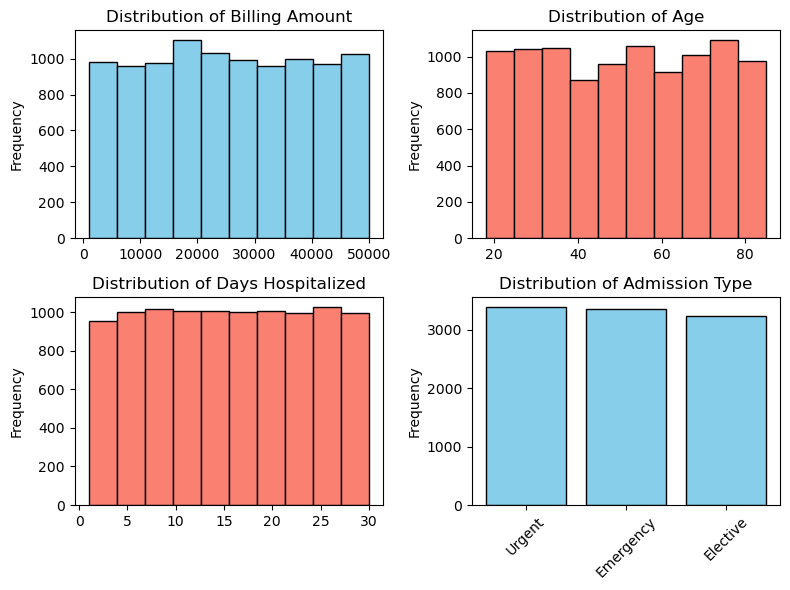

In [185]:
# Subplots for 'Billing Amount', 'Age', 'Days Hospitalized', 'Admission Type'
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# 'Billing Amount' Distribution:
axes[0, 0].hist(healthcare_dataset_copy['Billing Amount'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Billing Amount')
axes[0, 0].set_ylabel('Frequency')

# 'Age' Distribution:
axes[0, 1].hist(healthcare_dataset_copy['Age'], bins=10, color='salmon', edgecolor='black')
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_ylabel('Frequency')

# 'Days Hospitalized' Distribution:
axes[1, 0].hist(healthcare_dataset_copy['Days Hospitalized'], bins=10, color='salmon', edgecolor='black')
axes[1, 0].set_title('Distribution of Days Hospitalized')
axes[1, 0].set_ylabel('Frequency')

# 'Admission Type' Distribution:
at_counts = healthcare_dataset_copy['Admission Type'].value_counts()
axes[1, 1].bar(at_counts.index, at_counts, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Distribution of Admission Type')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Printing results
plt.tight_layout()
plt.show()

**Distribution Interpretation**: <br>
The plots display relatively even bar heights across different categories. Based on the plotted distributions, some insights that can be derived are:
- Uniform distribution
- Equal representation
- No dominant feature
- Lack of extreme values or outliers

### Boxplot Between Target Variable & Main Features:

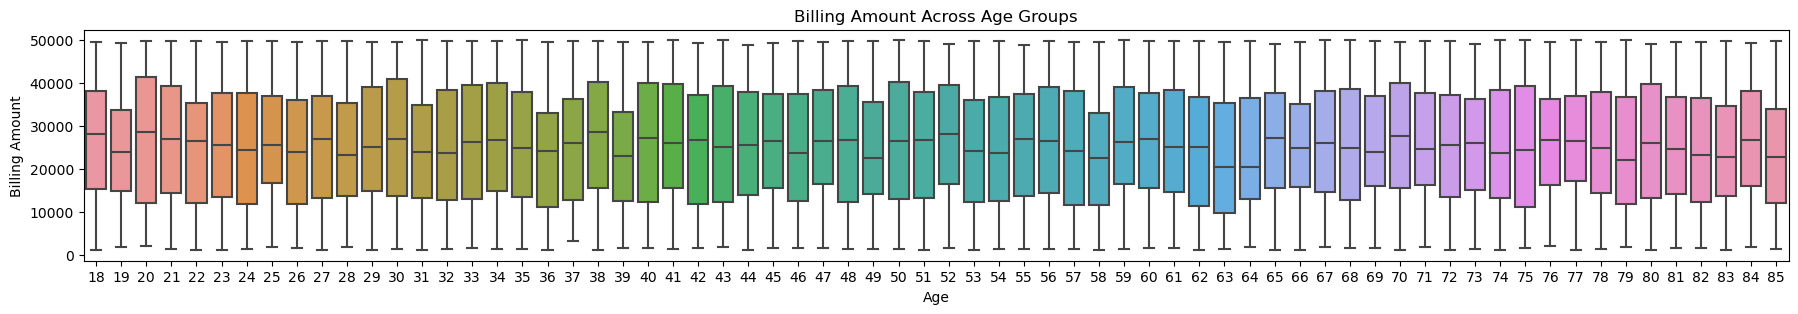

In [144]:
# 'Billing Amount' & 'Age' Boxplot:

plt.figure(figsize=(22, 3))
sns.boxplot(x='Age', y='Billing Amount', data=healthcare_dataset_copy)
plt.title('Billing Amount Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

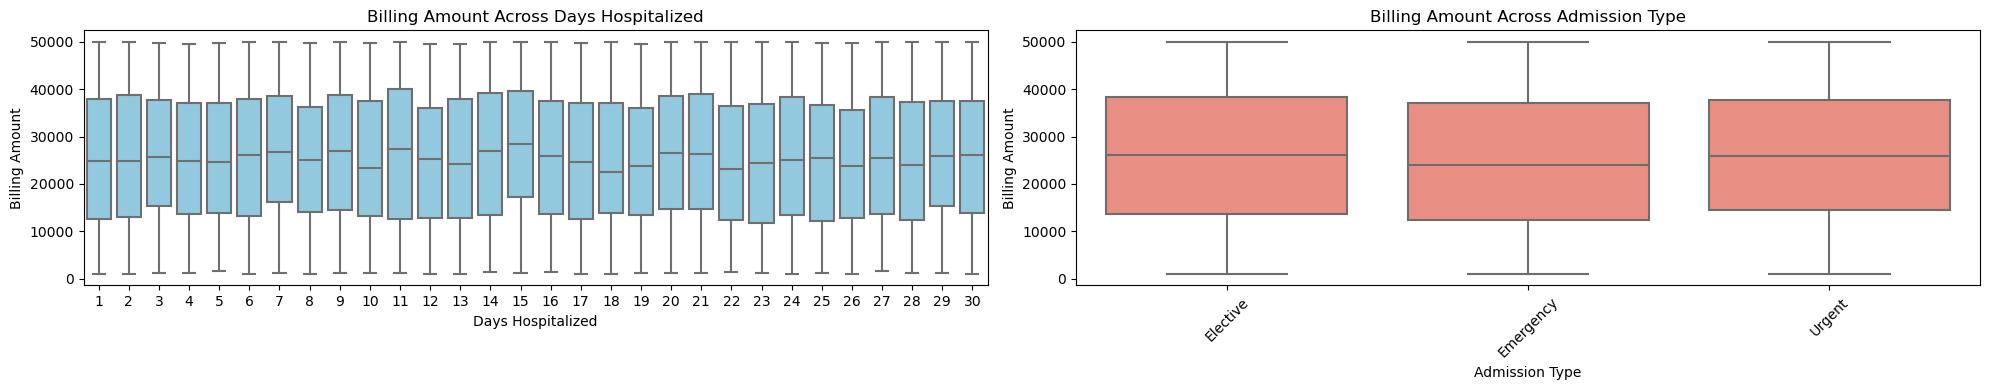

In [195]:
# Subplots for 'Billing Amount' & 'Days Hospitalized', 'Admission Type'
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# 'Billing Amount' & 'Days Hospitalized' Boxplot:
sns.boxplot(x='Days Hospitalized', y='Billing Amount', data=healthcare_dataset_copy, ax=axes[0], color="skyblue")
axes[0].set_title('Billing Amount Across Days Hospitalized')
axes[0].set_xlabel('Days Hospitalized')
axes[0].set_ylabel('Billing Amount')

# 'Billing Amount' & 'Admission Type' Boxplot:
sns.boxplot(x='Admission Type', y='Billing Amount', data=healthcare_dataset_copy, ax=axes[1], color="salmon")
axes[1].set_title('Billing Amount Across Admission Type')
axes[1].set_xlabel('Admission Type')
axes[1].set_ylabel('Billing Amount')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Boxplot Interpretation**: <br>
- **Relationship between main features**: Similarities in the lengths of the boxes, whisker lengeths, and placement across all categories suggest a relatively consistent distribution among the main features
- **Observations of outliers**: No points beyond the whiskers of the boxplots indicates the absence of extreme values or outliers
- **Relationship between features and target**: Absence of outliers and similar distributions indicate a relatively consistent impact of these main features on the target variable

### Scatterplot Between Target Variable and Main Features:

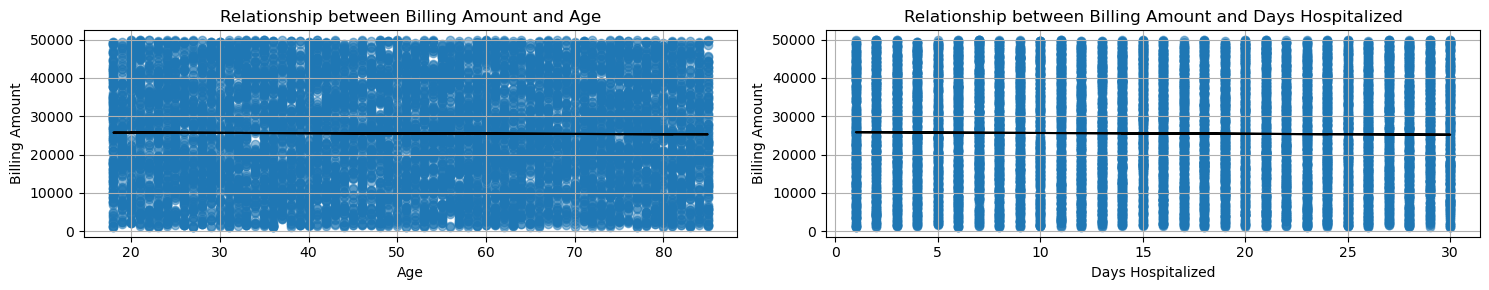

In [203]:
# Subplots for 'Billing Amount' & 'Age', 'Days Hospitalized'
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

# 'Billing Amount' & 'Age' Scatterplot with Trend Line:
axes[0].scatter(healthcare_dataset_copy['Age'], healthcare_dataset_copy['Billing Amount'], alpha=0.5)
axes[0].set_title('Relationship between Billing Amount and Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Billing Amount')
axes[0].grid(True)
m, b = np.polyfit(healthcare_dataset_copy['Age'], healthcare_dataset_copy['Billing Amount'], 1)
axes[0].plot(healthcare_dataset_copy['Age'], m * healthcare_dataset_copy['Age'] + b, color='Black')

# 'Billing Amount' & 'Days Hospitalized' Scatterplot with Trend Line:
axes[1].scatter(healthcare_dataset_copy['Days Hospitalized'], healthcare_dataset_copy['Billing Amount'], alpha=0.5)
axes[1].set_title('Relationship between Billing Amount and Days Hospitalized')
axes[1].set_xlabel('Days Hospitalized')
axes[1].set_ylabel('Billing Amount')
axes[1].grid(True)
m, b = np.polyfit(healthcare_dataset_copy['Days Hospitalized'], healthcare_dataset_copy['Billing Amount'], 1)
axes[1].plot(healthcare_dataset_copy['Days Hospitalized'], m * healthcare_dataset_copy['Days Hospitalized'] + b, color='Black')

plt.tight_layout()
plt.show()

In [208]:
# Performing one-hot encoding on 'Admission Type'
at_dummies = pd.get_dummies(healthcare_dataset_copy['Admission Type'])

# Concatenating the one-hot encoded columns with the original dataframe
healthcare_dataset_encoded = pd.concat([healthcare_dataset_copy, at_dummies], axis=1)

# Printing results
selected_columns = healthcare_dataset_encoded[['Elective', 'Emergency', 'Urgent']]
selected_columns.head().T

,0,1,2,3,4
Elective,True,False,False,False,False
Emergency,False,True,True,False,False
Urgent,False,False,False,True,True


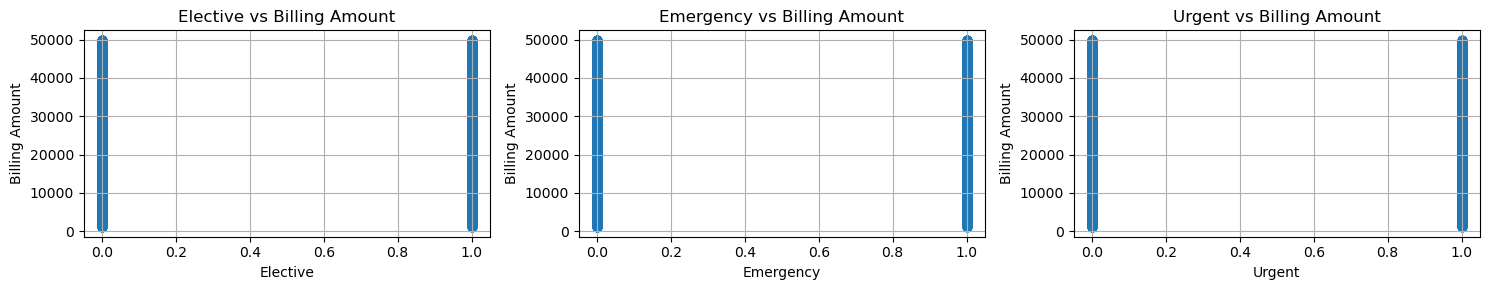

In [232]:
# Subplots for 'Billing Amount' & 'Elective', 'Emergency', 'Urgent'
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# 'Billing Amount' & 'Elective' Scatterplot:
axes[0].scatter(healthcare_dataset_encoded['Elective'], healthcare_dataset_encoded['Billing Amount'], alpha=0.5)
axes[0].set_title('Elective vs Billing Amount')
axes[0].set_xlabel('Elective')
axes[0].set_ylabel('Billing Amount')
axes[0].grid(True)

# 'Billing Amount' & 'Emergency' Scatterplot:
axes[1].scatter(healthcare_dataset_encoded['Emergency'], healthcare_dataset_encoded['Billing Amount'], alpha=0.5)
axes[1].set_title('Emergency vs Billing Amount')
axes[1].set_xlabel('Emergency')
axes[1].set_ylabel('Billing Amount')
axes[1].grid(True)

# 'Billing Amount' & 'Urgent' Scatterplot:
axes[2].scatter(healthcare_dataset_encoded['Urgent'], healthcare_dataset_encoded['Billing Amount'], alpha=0.5)
axes[2].set_title('Urgent vs Billing Amount')
axes[2].set_xlabel('Urgent')
axes[2].set_ylabel('Billing Amount')
axes[2].grid(True)

plt.tight_layout()
plt.show()

**Scatterplot Interpretation**: <br>
- **Correlation Between Features**: The pairs of features ('Age', 'Days Hospitalized', 'Elective', 'Emergency', 'Urgent') don't exhibit strong linear correlations with the 'Billing Amount'
- **Feature Target Relationship**: Based on these scatterplots, there seems to be little to no straightforward linear relationship between these specific features and the target ('Billing Amount')
- **Interpretation of Correlations**: The lack of significant correlations aligns with the complexity of healthcare data, where multiple factors might collectively influence the billing amount rather than individual variables alone

### Correlation Matrix Between Target Variable and Main Features:
- Confirming Hypothesis from Histogram, Boxplot, and Scatterplot Interpretations

In [220]:
# Creating another copy of the dataset to perform correlation procedures
healthcare_dataset_copy_v2 = healthcare_dataset_copy.copy()

# Creating List of columns to drop
columns_to_drop = ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Room Number', 'Discharge Date', 'Medication', 'Test Results']

# Dropping specified columns from 'healthcare_dataset_copy_v2'
healthcare_dataset_copy_v2.drop(columns=columns_to_drop, inplace=True)

# Printing result
healthcare_dataset_copy_v2.head().T

,0,1,2,3,4
Age,81,35,61,49,51
Billing Amount,37490.983364,47304.064845,36874.896997,23303.322092,18086.344184
Admission Type,Elective,Emergency,Emergency,Urgent,Urgent
Days Hospitalized,14,14,30,1,24


In [229]:
# Creating a label encoder instance
label_encoder = LabelEncoder()

# Applying label encoding to categorical columns
for col in healthcare_dataset_copy_v2.select_dtypes(include=['object']).columns:
    healthcare_dataset_copy_v2[col] = label_encoder.fit_transform(healthcare_dataset_copy_v2[col])

# Generate correlation matrix for all columns in healthcare_dataset_copy_v2
correlation_matrix = healthcare_dataset_copy_v2.corr()

In [231]:
# Printing result
correlation_matrix

,Age,Billing Amount,Admission Type,Days Hospitalized
Age,1.000000,-0.009483,0.003233,0.009111
Billing Amount,-0.009483,1.000000,0.002531,-0.013507
Admission Type,0.003233,0.002531,1.000000,-0.005942
Days Hospitalized,0.009111,-0.013507,-0.005942,1.000000


**Correlation Coefficients Notes**:
- Range from -1 to 1
- Closer to 1 indicates a strong positive correlation (as one variable increases, the other tends to increase)
- Closer to -1 indicates a strong negative correlation (as one variable increases, the other tends to decrease)
- A value around 0 suggests no linear relationship between the variables

**Correlation Matrix Interpretation**: <br>
Based on my interpretations from the histograms, boxplots, and scatterplots, all signs indicate a tendency towards weak correlation between all features, as the data seems to be distributed widely across the plots without any clear linear relationships. Therefore, I am running a correlation matrix to confirm my hypothesis. The results confirmed my hypotesis as the insights derived from the matrix are:
- Correlation coefficients with Billing Amount for all three features came very close to 0
- Indicates a weak relationship between variables
- Relationship with **Billing Amount**:
    - **Age**: Weak, slighly negative linear relationship (-0.009483)
    - **Admission Type**: Weak, slighly positive linear relationship (0.002531)
    - **Days Hospitalized**: Weak, slighly negative linear relationship (-0.013507)

### Model Strategy:

Based on my analysis of the dataset (weak correlations between variables), my strategy is to try several models to select the best-fit model for the project. This will be a trial and error approach and I hope to test model types:
- **Linear Regression**: Even with weak correlations, I would like to test to see if the model performs well
- **Decision Trees**: Test to see if it captures patterns (RandomForestRegressor)
- **Regularized Regression**: Using models like Ridge Regression or Lasso Regression, test to see if it captures patterns

### JC Comment:
Alternate routes if I am continously facing challenges with the current approach:
- **Different Target Variable**: If predicting 'Billing Amount' isn't providing insights due to weak correlations, switching to a categorical target like 'Test Results' could be better for this dataset. It may involve classification tasks, providing clearer patterns compared to regression.
- **Feature Engineering**: Find a new way to create a new feature that can improve correlation between variables.
- **Exploring Other Datasets**: Finding a different dataset with stronger correlations among features could be a better option.

## Testing RandomForestRegressor
---

In [243]:
# Setup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

### Data Preparation:

In [236]:
# Selecting features and target variable
selected_features = ['Age', 'Days Hospitalized', 'Admission Type']
target_variable = 'Billing Amount'

# Extracting features and target variable
X = healthcare_dataset_copy[selected_features]
y = healthcare_dataset_copy[target_variable]

### Feature Encoding:

In [237]:
# Encoding categorical feature 'Admission Type'
X_encoded = pd.get_dummies(X, columns=['Admission Type'])

### Training and Testing Split:

In [238]:
# Splitting the dataset into training and testing sets (Training 80% & Testing 20%)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Model Selection (RandomForestRegressor):

In [239]:
# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

### Model Training:

In [240]:
# Training the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation:

In [241]:
# Evaluating model performance
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 258549038.87910864


In [242]:
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: -0.2935026105135907


**Evaluation Interpretation**:
- MSE of 258,549,039 suggests model performance is low and needs further refinement of data
- R2 of -0.29 indicates the model is performing poorly as it is a value less than 0

**JC Comment**: <br>
Professor, any advice would be much appreciated.